## M046_2024_12_18_16_00

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal

from tools.dsp.preprocessing import preprocess
import tools.viz.rasters as rt
from tools.viz.dimensionality import plot_VAF
from tools.params import Params, colors
# from tools.dimensionality.utils import participation_ratio, pca_pr


In [2]:
# TODO: add example data to the repo and run on that
data_dir = "/data/bnd-data/raw/M046/M046_2024_12_18_16_00"
fname0 = os.path.join(data_dir, "M046_2024_12_18_16_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M046_2024_12_18_16_00_pyaldata_1.mat")

In [3]:
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df = pd.concat([df0, df1], ignore_index=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field SSp_ll_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field SSp_ll_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.


In [117]:
for region in ["MOp", "SSp_ll", "CP", "Thal"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 319
Neurons in SSp_ll: 167
Neurons in CP: 509
Neurons in Thal: 232


In [4]:
df_ = preprocess(df, only_trials=False)

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: motion_sensor_xy might be a time-varying field. It matches the length of Thal_spikes on 99.87562189054727% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyalda

Combined every 3 bins
Resulting Thal_spikes ephys data shape is (NxT): (204, 10000)
Resulting all_spikes ephys data shape is (NxT): (12, 10000)
Resulting SSp_ll_spikes ephys data shape is (NxT): (99, 10000)
Resulting MOp_spikes ephys data shape is (NxT): (185, 10000)
Resulting CP_spikes ephys data shape is (NxT): (252, 10000)


# Example plots

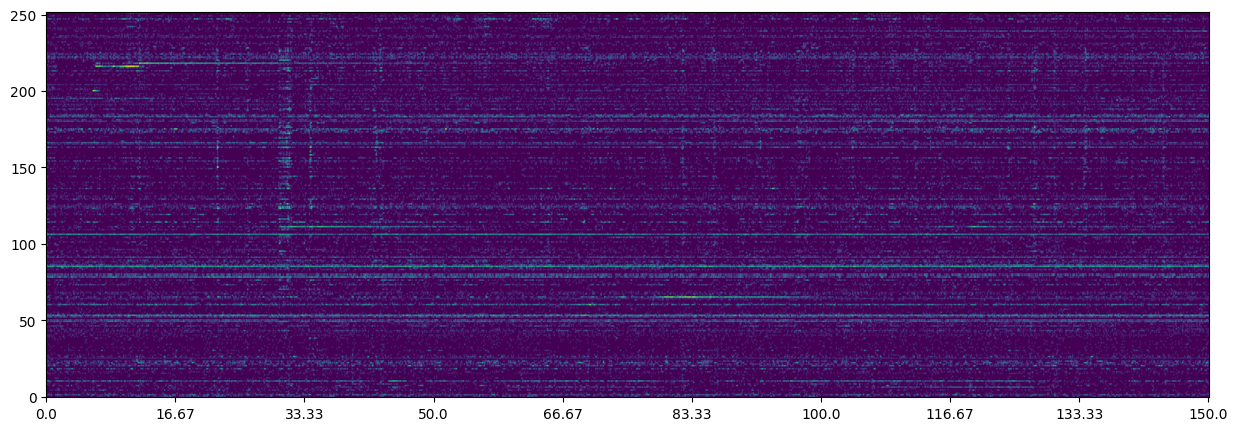

In [164]:
fig, axes = plt.subplots(1, figsize=(15, 5), sharey=True)


area="CP"
rt.plot_heatmap_raster(df_[50:75], area=area,ax=axes, show=False, add_sol_onset=False)
plt.show()

# rates.shape

In [ ]:
for trial in range(8):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 3), sharey=True)
    axes = rt.plot_fr_raster(df_, axes, Params.sol_dir_to_level.keys(), trial=trial, area='MOp')
plt.show()

In [ ]:
for trial in np.arange(10):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 5), sharey=True)
    axes = rt.plot_fr_raster(df_, axes, Params.sol_dir_to_level.keys(), trial=trial, area='CP')
plt.show()

In [ ]:
for trial in np.arange(10):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 3), sharey=True)
    axes = rt.plot_fr_raster(df_, axes, Params.sol_dir_to_level.keys(), trial=trial, area='SSp_ll')
plt.show()

In [ ]:
for trial in np.arange(10):
    fig, axes = plt.subplots(1, len(Params.sol_dir_to_level.keys()), figsize=(15, 5), sharey=True)
    axes = rt.plot_fr_raster(df_, axes, Params.sol_dir_to_level.keys(), trial=trial, area='Thal')
plt.show()

# Dimensionality

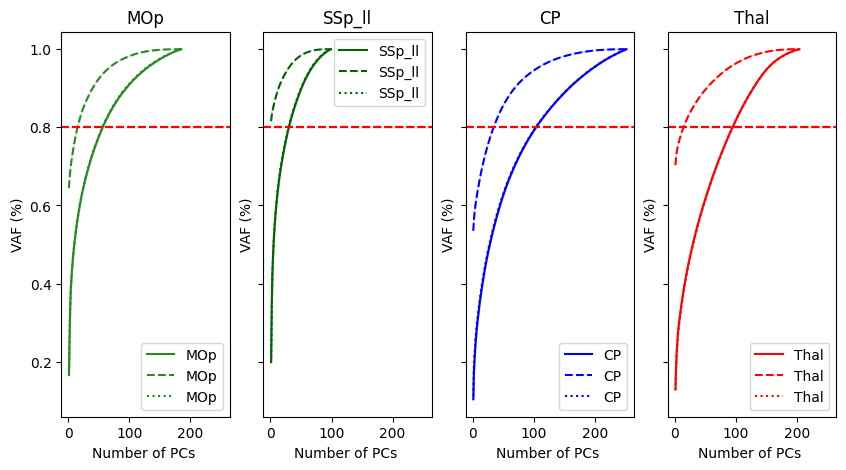

In [9]:
df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_intertrials = pyal.select_trials(df_, df_.trial_name == 'intertrial')
df_free = pyal.select_trials(df_, df_.trial_name == 'free')
df_free = df_free.iloc[[0]]

data_list = [df_trials]
areas = ["MOp", "SSp_ll", "CP", "Thal"]
n_components = None
epoch = None
model = "pca"


fig, axes = plt.subplots(1, len(areas), figsize=(10, 5), sharey='all', sharex='all')
for area, ax in zip(areas, axes):
    ax1 = plot_VAF(ax = ax, data_list = [df_trials], areas = area, n_components = n_components, epoch = epoch, model = model, show=False)
    ax1 = plot_VAF(ax = ax, data_list = [df_free], areas = area, n_components = n_components, epoch = epoch, model = model, show=False, linestyle='--')
    ax1 = plot_VAF(ax = ax, data_list = [df_intertrials], areas = area, n_components = n_components, epoch = epoch, model = model, show=False, linestyle=':')


    ax.set_title(f"{area}")



plt.show()

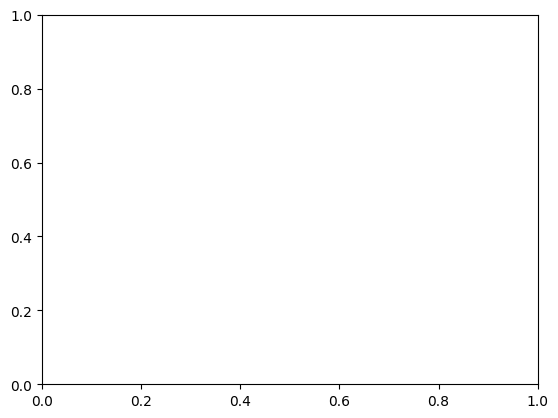

In [6]:
data_list = [df_]
areas = ["MOp", "SSp_ll", "CP", "Thal"]
n_components = 99
epoch = None
model = "pca"

fig, ax = plt.subplots()
# ax.set_xlim([0, 300])
# plt.show()

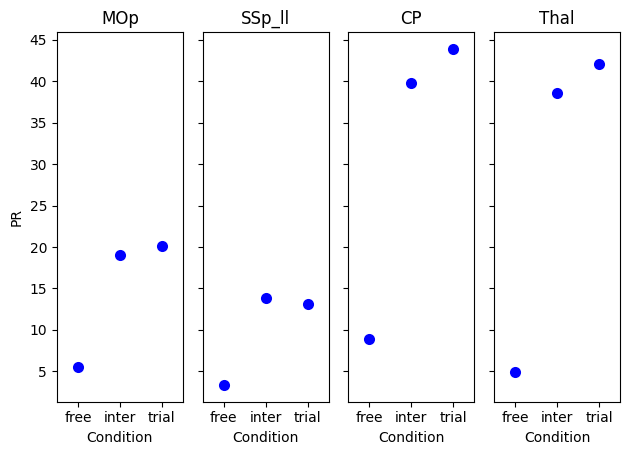

In [49]:
# TODO: Refactor into function

def plot_participation_ratio_per_session(df, areas, epoch = None, trial_query = None, intertrial_query = None, title=None):
    results = {area: {'free': [], 'inter': [], 'trial': []} for area in areas}

    df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
    df_trials = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

    df_intertrials = pyal.select_trials(df_, df_.trial_name == 'intertrial')
    df_free = pyal.select_trials(df_, df_.trial_name == 'free')


    if epoch is not None:
        df_trials = pyal.restrict_to_interval(df_trials, epoch_fun=epoch)

    if trial_query is not None:
        print("Applying query")
        df_trials = pyal.select_trials(df_trials, trial_query)

    for area in areas:
        free_data = pyal.concat_trials(df_free, f"{area}_rates")
        results[area]['free'].append(pca_pr(free_data))

        trial_data = pyal.concat_trials(df_trials, f"{area}_rates")
        results[area]['trial'].append(pca_pr(trial_data))

        intertrial_data = pyal.concat_trials(df_intertrials, f"{area}_rates")
        results[area]['inter'].append(pca_pr(intertrial_data))

    

    fig, axes = plt.subplots(1, len(areas), sharey=True)

    for i, area in enumerate(areas):
        data = pd.DataFrame({
            'PR': results[area]['free'] + results[area]['inter'] + results[area]['trial'],
            'Condition': ['free'] * len(results[area]['free']) + ['inter'] * len(results[area]['inter']) + ['trial'] * len(results[area]['trial'])
        })
        sns.stripplot(data=data, x='Condition', y='PR', s=8, color='blue', ax=axes[i])
        axes[i].set_title(area)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()



areas = ["MOp", "SSp_ll", "CP", "Thal"]
plot_participation_ratio_per_session(df_, areas)


Applying query


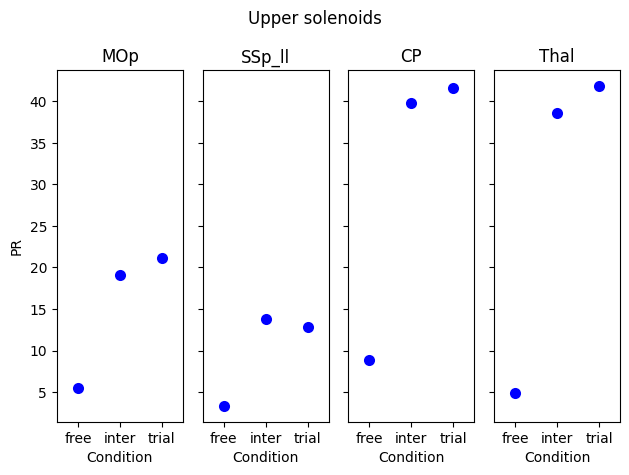

Applying query


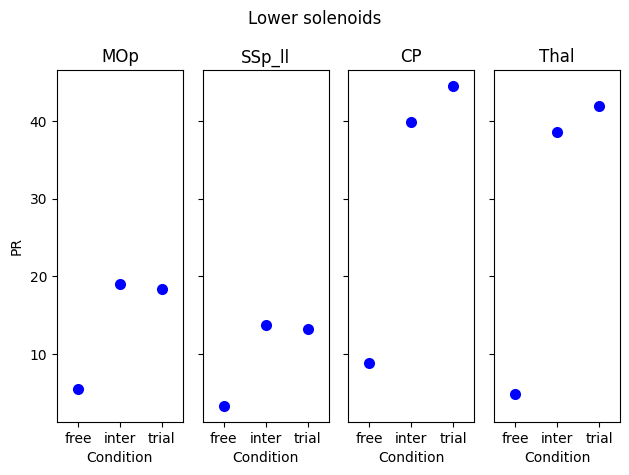

In [50]:
plot_participation_ratio_per_session(df_, areas, trial_query="sol_level_id == 0", title='Upper solenoids')
plot_participation_ratio_per_session(df_, areas, trial_query="sol_level_id == 1", title='Lower solenoids')


Applying query


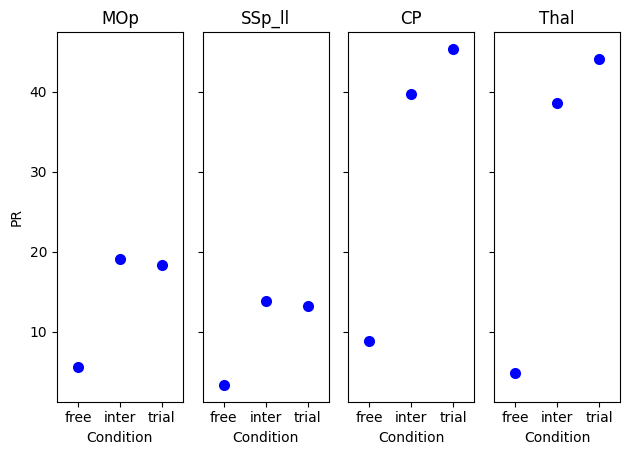

In [52]:
plot_participation_ratio_per_session(df_, areas, trial_query="values_Sol_duration == 100")


In [15]:
df_trials.idx_motion[0]
df_trials.idx_sol_on[0]
len(df_trials)

401

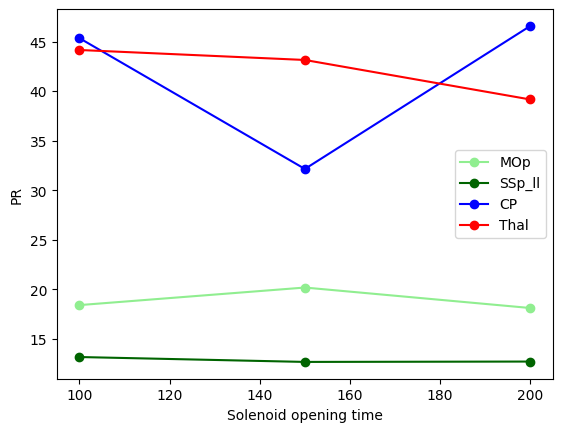

In [ ]:
results = {area: [] for area in areas}
sol_openings = [100, 150, 200]

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

for area in areas:
    for sol_opening in sol_openings:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.values_Sol_duration == sol_opening)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area].append(pca_pr(rates))

fig, ax = plt.subplots(1)
for area in areas:
    ax.plot(sol_openings, results[area], color=getattr(colors, area), label=area, marker='o', linestyle='-')
    ax.legend()
    ax.set_xlabel('Solenoid opening time')
    ax.set_ylabel('PR')

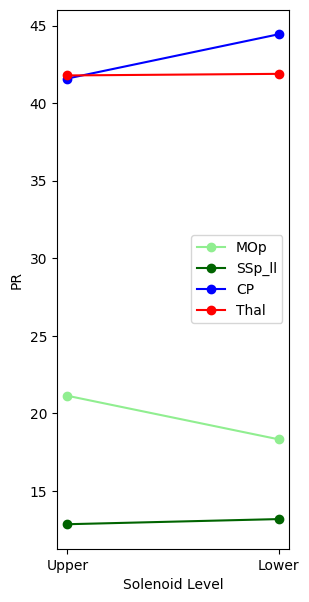

In [41]:
results = {area: [] for area in areas}
sol_levels = [0, 1]

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

for area in areas:
    for sol_level in sol_levels:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.sol_level_id == sol_level)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area].append(pca_pr(rates))

fig, ax = plt.subplots(1, figsize=(3, 7))
for area in areas:
    ax.plot(sol_levels, results[area], color=getattr(colors, area), label=area, marker='o', linestyle='-')
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Upper', 'Lower'])
    ax.set_xlabel('Solenoid Level')
    ax.set_ylabel('PR')

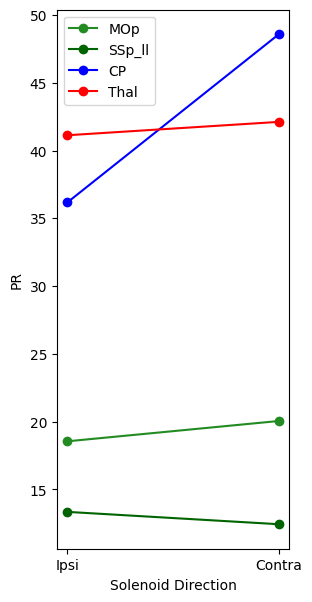

In [12]:
results = {area: [] for area in areas}
sols_ipsi_contra = [0, 1]

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

for area in areas:
    for sol_ipsi_contra in sols_ipsi_contra:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.sol_contra_ipsi == sol_ipsi_contra)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area].append(pca_pr(rates))

fig, ax = plt.subplots(1, figsize=(3, 7))
for area in areas:
    ax.plot(sol_levels, results[area], color=getattr(colors, area), label=area, marker='o', linestyle='-')
    ax.legend()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Ipsi', 'Contra'])
    ax.set_xlabel('Solenoid Direction')
    ax.set_ylabel('PR')

/tmp/ipykernel_2339316/4157658809.py:16: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [802]
  df__ = pyal.restrict_to_interval(df_trials_motion, epoch_fun=perturb_epoch)
/tmp/ipykernel_2339316/4157658809.py:16: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [802]
  df__ = pyal.restrict_to_interval(df_trials_motion, epoch_fun=perturb_epoch)
/tmp/ipykernel_2339316/4157658809.py:16: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [802]
  df__ = pyal.restrict_to_interval(df_trials_motion, epoch_fun=perturb_epoch)
/tmp/ipykernel_2339316/4157658809.py:16: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [802

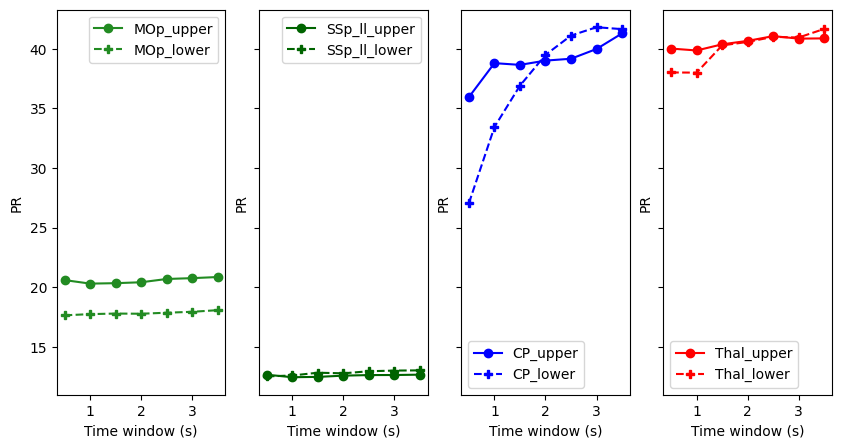

In [21]:
results = {area: {'0': [], '1': []} for area in areas}
sol_levels = [0, 1]

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]
window_times = np.arange(start=0.5, stop=4, step=0.5)

for area in areas:
    for sol_level in sol_levels:
        for window_time in window_times:
            perturb_epoch = pyal.generate_epoch_fun(
                start_point_name="idx_sol_on",
                rel_start=int(-0.5 / Params.BIN_SIZE),
                rel_end=int(window_time / Params.BIN_SIZE),
            )

            df__ = pyal.restrict_to_interval(df_trials_motion, epoch_fun=perturb_epoch)
            df_specfic_sol_opening = pyal.select_trials(df__, df__.sol_level_id == sol_level)
            rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
            results[area][str(sol_level)].append(pca_pr(rates))


fig, axes = plt.subplots(1, len(areas), figsize=(10, 5), sharey='all')
for area, ax in zip(areas, axes):

    ax.plot(window_times, results[area]['0'], color=getattr(colors, area), label=f"{area}_upper", marker='o', linestyle='-')
    ax.plot(window_times, results[area]['1'], color=getattr(colors, area), label=f"{area}_lower", marker='P', linestyle='--')
    ax.legend()
    # ax.set_xticklabels(['Upper', 'Lower'])
    ax.set_xlabel('Time window (s)')
    ax.set_ylabel('PR')


<Axes: xlabel='Sol', ylabel='PR'>

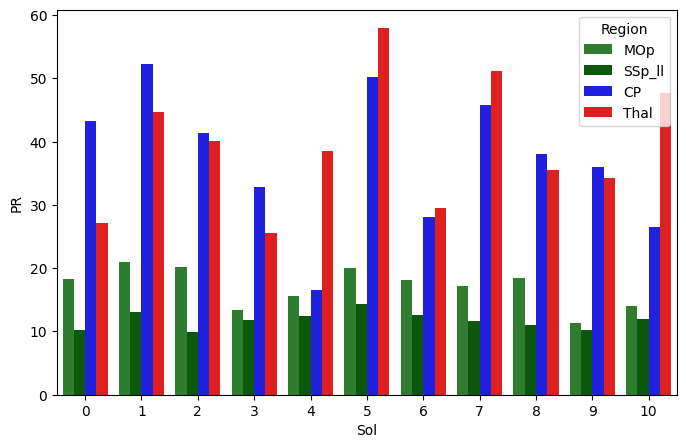

In [106]:
results = {area: {} for area in areas}
sol_number = np.arange(11)

df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]

for area in areas:
    for sol in sol_number:
        df_specfic_sol_opening = pyal.select_trials(df_trials_motion, df_trials_motion.values_Sol_direction == sol)
        rates = pyal.concat_trials(df_specfic_sol_opening, f"{area}_rates")
        results[area][str(sol)] = pca_pr(rates)

df_results = pd.DataFrame.from_dict(results, orient='columns')
df_results['Sol'] = sol_number
df_results = df_results.melt(id_vars=["Sol"], var_name="Region", value_name="PR")


fig, axes = plt.subplots(1, figsize=(8, 5), sharey='all')

sns.barplot(df_results, x='Sol', y='PR', hue='Region', palette=[getattr(colors, area) for area in areas], ax=axes)


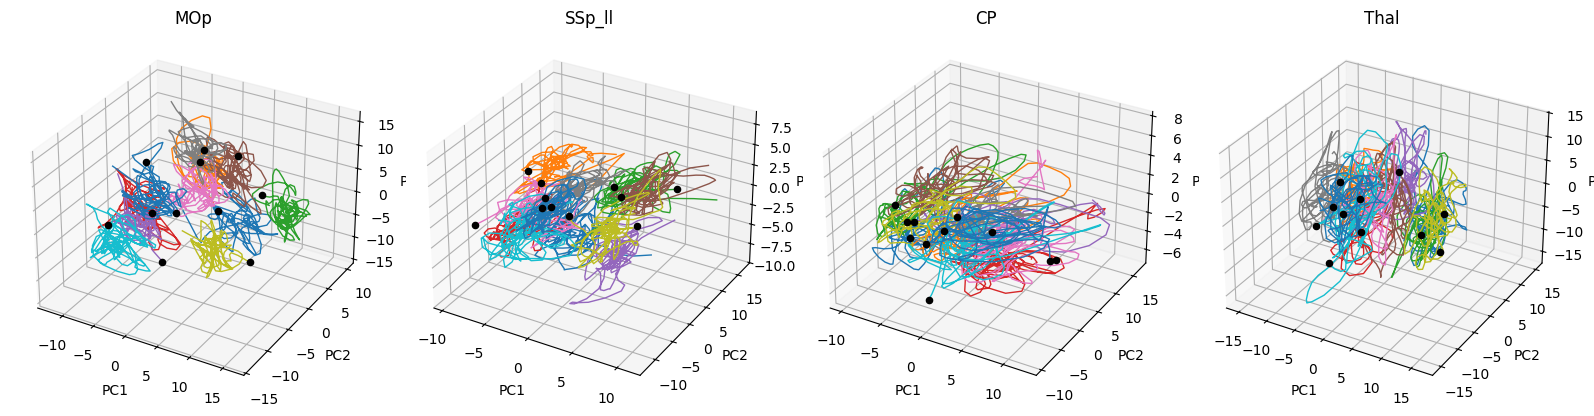

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


df_trials = pyal.select_trials(df_, df_.trial_name == 'trial')
df_trials_motion = df_trials[df_trials['idx_motion'].apply(lambda x: np.any(x < df_trials.idx_sol_on[0]))]
df_trials_motion = df_trials_motion[:-1]

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["MOp", "SSp_ll", "CP", "Thal"]
epoch = None
n_components = 10

targets = np.unique(df_trials_motion[category])

df_trials_motion = pyal.restrict_to_interval(df_trials_motion, epoch_fun=epoch) if epoch is not None else df_trials_motion

timepoint = -1


# Define subplot grid dimensions
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * 1))

# Ensure axes is a 2D array for easy indexing

# Loop through areas (columns) and trial types (rows)
for ax, area in zip(axes, areas):
    rates = np.concatenate(df_trials_motion[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

    # Fit PCA model
    rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
    
    # Apply PCA to the dataframe
    df___ = pyal.apply_dim_reduce_model(df_trials_motion, rates_model, area+'_rates', '_pca')


    # Select the correct subplot
    # Loop through targets and plot averaged trials
    for tar in targets:
        df____ = pyal.select_trials(df___, df___[category] == tar)
        ex = pyal.get_sig_by_trial(df____, '_pca')

        ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
        ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                        color='k', s=20, marker='o', label="Sol on")

        ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
        # ax.view_init(60, -47)

    # Titles and labels
    ax.set_title(f"{area}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()



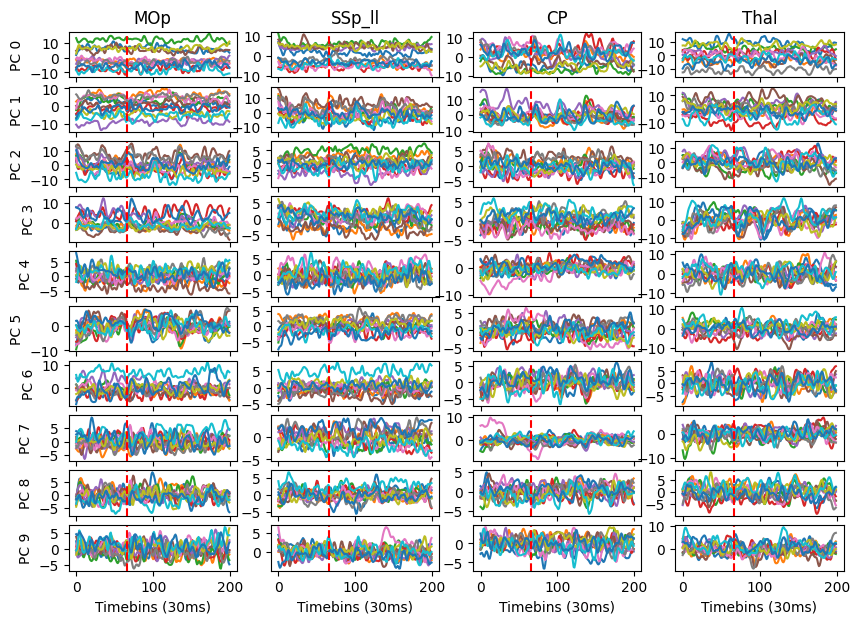

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
trial_types = ['trial']
epoch = None
n_components = 10


df_trials_motion = pyal.restrict_to_interval(df_trials_motion, epoch_fun=epoch) if epoch is not None else df_trials_motion
df_int = df_trials_motion[:-1]
targets = np.unique(df_trials_motion[category])


timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, len(areas), figsize=(10, 7), sharex='all')
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()